# Hospital Readmission Prediction - Support Vector Machine

This notebook contain the code for Candian Hospital Re-Admission using support vector machines.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import optuna

In [2]:
train_data = pd.read_csv("./processed_data.csv")

We then did that appropriate model, and then did the test,train split with 80:20 ratio.

In [3]:
X = train_data.drop('readmission_id', axis=1)
y = train_data['readmission_id']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# svm_poly = SVC(kernel='poly', degree=3, random_state=42)
# svm_poly.fit(X_train, y_train)
# y_pred_poly = svm_poly.predict(X_val)
# accuracy_poly = accuracy_score(y_val, y_pred_poly)
# print(f'Polynomial Kernel Accuracy: {accuracy_poly}')

In [5]:
# svm_rbf = SVC(kernel='rbf', random_state=42)
# svm_rbf.fit(X_train, y_train)
# y_pred_rbf = svm_rbf.predict(X_val)
# accuracy_rbf = accuracy_score(y_val, y_pred_rbf)
# print(f'RBF Kernel Accuracy: {accuracy_rbf}')

Used Optuna to tune the hyper parameter and then get the best accuracy.

In [6]:
# Define the objective function for SVM and hyperparameter tuning
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    gamma = trial.suggest_loguniform('gamma', 1e-5, 1e2)

    svm = SVC(C=C, gamma=gamma, kernel='rbf', random_state=42)
    svm.fit(X_train, y_train)
    
    preds = svm.predict(X_val)
    acc = accuracy_score(y_val, preds)
    return acc

In [7]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train SVM using the best hyperparameters
best_svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel='rbf', random_state=42)
best_svm.fit(X_train, y_train)

# Evaluate the best SVM model
preds = best_svm.predict(X_val)
acc = accuracy_score(y_val, preds)
print(f"Accuracy: {acc}")

[I 2023-12-17 12:05:16,383] A new study created in memory with name: no-name-9b955443-c0fc-4a91-93a3-ebeef065b37d
/tmp/ipykernel_531952/121262366.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e2)
/tmp/ipykernel_531952/121262366.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e2)
[I 2023-12-17 12:30:29,403] Trial 0 finished with value: 0.5446378439079169 and parameters: {'C': 0.11318607501722285, 'gamma': 0.06159210189031682}. Best is trial 0 with value: 0.5446378439079169.
/tmp/ipykernel_531952/121262366.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.

Best hyperparameters: {'C': 17.612834341019255, 'gamma': 0.00025923625194586937}
Accuracy: 0.6948343627175744


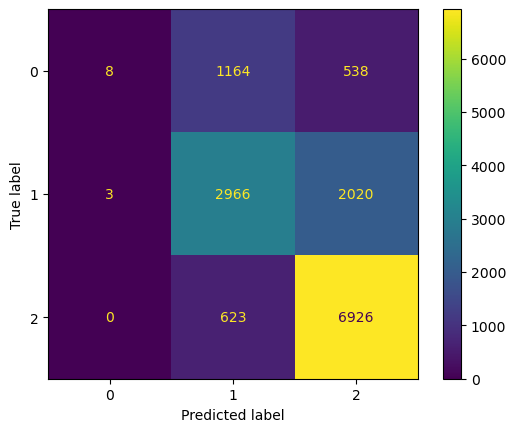

In [8]:
cm = confusion_matrix(y_val, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(3))
disp.plot()
plt.show()

In [9]:
X_test = pd.read_csv("./test_data.csv")
test_predictions_rbf = best_svm.predict(X_test)

In [ ]:
df_output = pd.read_csv("../canadian-hospital-re-admittance-challenge/sample_submission.csv")
df_output["readmission_id"] = test_predictions_rbf
df_output.to_csv("submission_svm1.csv", index=False)